In [1]:
# %reload_ext nb_black

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data_url = "https://docs.google.com/spreadsheets/d/1-UsRiETIQzkT5LWICVx3t-w9_-EgW5giL3K6lVkimYQ/export?format=csv"

* Read in the data at `data_url`
* What things should we do to get to know the data?
* Be curious, are there any particular things you'd want to investigate in this data?

In [3]:
titanic = pd.read_csv(data_url)

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
titanic['Survived'].corr(titanic['Pclass'])

-0.33848103596101475

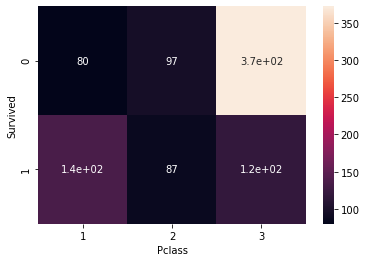

In [9]:
crosstab = pd.crosstab(titanic.Survived, titanic.Pclass)
sns.heatmap(crosstab, annot=True)
plt.show()

* Create a histogram of the `'Fare'` column

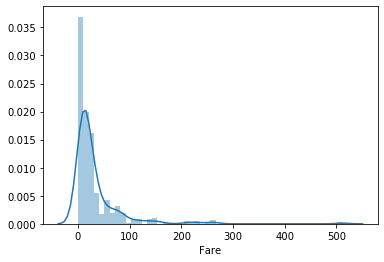

In [10]:
sns.distplot(titanic.Fare)
plt.show()

* Take a random sample of `50` rows from the dataframe
* What is the mean of the `'Fare'` column in this sample?

Following the google template:

```
template: python <package> <data type> <thing you want to do>
```

```
potential google for us: python pandas dataframe random sample
```

In [11]:
sample_size = 50
titanic.Fare.sample(sample_size).mean()


28.693500000000004

We're going to use a technique known as *bootstrapping* where we will sample *with replacement* and calculate the mean.  By doing this we can get a better feel of what the mean of the *population* is and see some uncertainity in this population mean.  It might feel kind of hacky, but it is a robust technique in practice.

* Write a for loop that loops `100` times
* In each iteration of the loop:
    * generate a random sample of size `10`
    * take the mean of the `'Fare'` column in this random sample
    * store this sample mean in a list

In [12]:
sample_size = 10
n_samples = 500
sample_means = []
for _ in range(n_samples): 
    sample_mean = titanic.Fare.sample(sample_size).mean()
    sample_means.append(sample_mean)

* Plot a histogram of the sample means from your bootstrapping

This distribution that we're plotting is known as a *sampling distribution*.

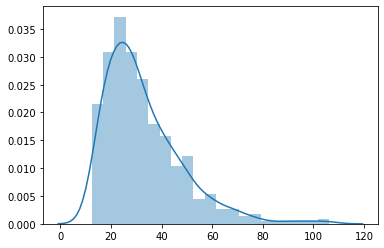

In [13]:
sns.distplot(sample_means)
plt.show()

Repeat the process a couple times, increasing the sample size each time.  What do you see?

----


## Central Limit Theorem

Alright some easy to confuse language coming up.

* sample distribution: This will refer to our actual data.  For example, the raw fare data we plotted is the distribution of our sample data.
* sampling distribution: This will refer to the distribution of a statistic.  For example, the sample means that we plotted after bootstrapping.

When the sample size is large enough, the *sampling* distribution of the means will be approximately normal. This occurs regardless of the shape of the underlying distribution.

The key point is *large enough*; if you start with normal data, it doesn't take a big sample size to see normality in the sampling distribution.  If you have non-normal data, it takes a larger sampe size to overwhelm this non-normality.  What is large enough?  Unfortunately, no perfect answer, we'll discuss this more when applying the CLT to t-tests.

Sampling distributions look normal... so what? This will be the basis for statistical inference (i.e. drawing conclusions about a population when we only have a sample of the data).

We will run some statistical tests in the future that have an assumption of normality.  That is, these tests fail to be a good test if our data isn't following a normal distribution.  This normality assumption is referring to the sampling distribution.  Even very non-normal data can have a normal sampling distribution if our sample size is large enough.

Note we will still run normality checks on the sample data itself.  For small sample sizes, we will need to see normality in our data in order to see normality in the sampling distribution.

## Bayes

* What is the observed survival rate of the passengers on the titanic?
* What if the events of the titanic were to repeat itself? Would we be confident in saying that this is the correct survival rate or would we want some wiggle room around our estimate?

In [14]:
titanic.Survived.mean()

0.3838383838383838

Up until now, we've been letting the data tell us everything.  Sometimes, we have some strong knowledge coming into an analysis, that is, we have a prior belief.

Whenever we end up with data, there is some luck involved in what the data is showing.  If we surveyed people, there's a chance we got a group of people with some bias.  To protect against this, we might want to have overwhelming evidence to overcome our prior belief before changing our mind.

For example, maybe we are working with a marketing department and we want to run some experiments with a focus group to see how successful a new campaign will be.  The marketing department has data on how well their campaigns have worked in the past, we might not want to ignore this information but incorporate it in into our analysis.  If they say they're best ever conversion rate is 30%, we might want this info built into the analysis.

----

We're going to get grisly and estimate the true survival rate of titanic passengers.

We'll look at this as if we have no information (aka all rates are equally likely).  Then we'll see how this prior belief can impact our results. 

A common distribution for Bayesian statistics is the beta distribution.

* Use `np.random.beta()` to generate `10000` data points; set both the alpha and beta parameters to `1`
* Create a histogram of this generated data

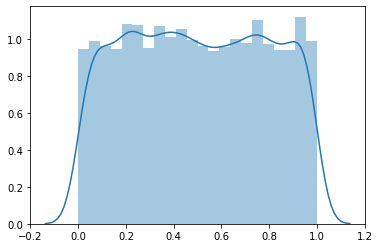

In [15]:
# uninformed prior
sample = np.random.beta(1, 1, 10000)
sns.distplot(sample)
plt.show()

^that my be our prior belief about survival rate if we know nothing about cruise ship crashes.  All rates from [0, 1] are equally likely.  Let's use this as our prior belief to estimate a 'true' survival rate.

* Define a variable that holds the number of people who survived
* Define a variable that holds the total number of passengers
* Define a variable that holds the observed survival rate

In [16]:
obs_n_surv = titanic.Survived.sum()
n_pass = titanic['PassengerId'].nunique()
obs_rate = titanic.Survived.mean()


In [39]:
print(obs_n_surv)
print(n_pass)
print(obs_rate)

342
891
0.3838383838383838


The outline of our process that we'll repeat many times:

* Generate a random rate from the prior distribution
* Use this rate to generate a valid number of survivors
    * The binomial distribution is a good fit for this.  It gives us a random number of 'successes' for a number of trials.  For example, we could use it to tell us how many heads we might get if we flipped a coin 10 times (in python this coin flip example could look like `np.random.binomial(10, 0.5)`)
* Check if this generated number of survivors matches what we observed, if it does, it's a valid possibility of the 'true' survival rate.  Store these matches and they will our distribution of possible survival rates, this allows us to express our uncertaintity.

* Write the process outlined above using an 'uninformed prior' (i.e. use a beta distribution with 1 for both params)

In [37]:
valid_rates = []

for _ in range (100000):
    # prior 
    rate = np.random.beta(1,1)

    # Generative process
    gen_n_surv = np.random.binomial(n_pass, rate)

    if gen_n_surv == obs_n_surv:
        valid_rates.append(rate)

In [42]:
print(obs_n_surv)
print(gen_n_surv)

342
397


Plot the distribution of the resulting valid rates.

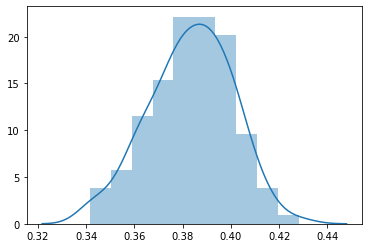

In [38]:
sns.distplot(valid_rates)
plt.show()

* Copy/paste your process in the below cell (or convert the process to a function if you're feeling fancy)
* Create a beta distribution with a pessimistic or optimistic prior belief about the survival rate
* Use this new prior in the process rather than an uninformed one and plot the results

*Note, if you're prior is fairly optimistic, it will take more iterations to generate a large distribution.*

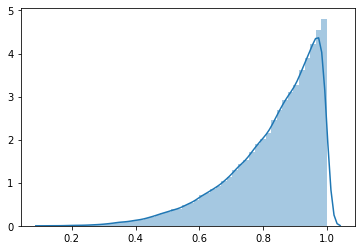

In [34]:
alpha = 5

beta = 1

sns.distplot(np.random.beta(alpha, beta, 100000))
plt.show()

In [35]:
valid_rates = []

for _ in range (100000):
    # prior 
    rate = np.random.beta(alpha,beta)

    # Generative process
    gen_n_surv = np.random.binomial(n_pass, rate)

    if gen_n_surv == obs_n_surv:
        valid_rates.append(rate)

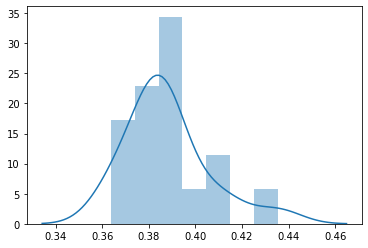

In [36]:
# Plot the posterior
sns.distplot(valid_rates)
plt.show()